# **[EIE409] Programación 2**

## **Clase 9:**

### **Tabla de contenido**

1. Pandas.




## **1. Pandas**

| [Revisar documentación oficial para tener una guía](https://pandas.pydata.org/docs/getting_started/index.html#getting-started) |

**Pandas** es una biblioteca de código abierto con licencia BSD que proporciona estructuras de datos y herramientas de análisis de datos de alto rendimiento y fáciles de usar para el lenguaje de programación Python.

### **1.1 Instalar Pandas**

Para utilizar Pandas debemos primero instalarlo en nuestro ambiente, en el caso de google colab ya viene instalado, simplemente se debe importar.

In [2]:
!pip install -q pandas

### **1.2 Importar Pandas**

In [3]:
import pandas as pd

### **1.3 Utilizando Pandas**

| [Esta sección está basada en la documentación oficial entregada por Pandas](https://pandas.pydata.org/docs/user_guide/index.html#user-guide) |

#### **1.3.1 Series**

Primero veremos el **método Series() de Pandas**, las cuales son operaciones en una dimensión

##### **1) Series usando un ndarray**

In [5]:
import numpy as np

data = np.random.randn(5)
print("Genero 5 datos aleatorios: ", data)

index = ['a', 'b', 'c', 'd', 'e']

s = pd.Series(data, index=index)

Genero 5 datos aleatorios:  [ 1.40904264  0.8491128   0.38686805 -0.13097078  0.18855948]


In [ ]:
# Visualice la variable s

Cuando definimos la variable `data` en pandas puede ser:

* Un **diccionario** de python.
* Un ndarray (array de numpy).
* Un escalar.

Cuando definimos la variable ``index`` estamos pasando etiquetas de ejes. Podemos no entregarle la etiquetas de eje y se mostrará el índice de 0 a n.

In [7]:
data = np.random.randn(5)

s = pd.Series(data)

In [ ]:
# Visualice la variable s

##### **2) Series usando un diccionario**

In [9]:
dic = {'Nombre': 'Gabriel', 'Primer Apellido': 'Olmos', 'Segundo Apellido': 'Leiva'}

s = pd.Series(dic)

In [ ]:
# Visualice la variable s

In [13]:
# Podemos cambiar las etiquetas de indexación
index = ['a', 'b', 'c']

s = pd.Series(dic, index=index)

In [ ]:
# Visualice la variable s

**Nota**: NaN es el marcador estándar de datos perdidos en Python.

##### **3) Series usando un escalar**

In [15]:
s = pd.Series(5.0, index=["a", "b", "c", "d", "e"])

In [ ]:
# Visualice la variable s

##### **4) Series es de tipo ndarray**

Esto quiere decir que el **objeto s** se comporta como un array de numpy. **Series** actúa de forma muy similar a un ndarray y es un argumento válido para la mayoría de las funciones NumPy. Sin embargo, operaciones como el troceado también trocearán el índice.

In [18]:
data = np.random.randn(8)

In [ ]:
# Muestra la variable data

In [19]:
s = pd.Series(data)

In [22]:
# Muestra la variable s

In [23]:
s

0   -1.755696
1   -0.022431
2    1.062576
3    0.304911
4   -0.837923
5    0.180783
6   -0.187798
7    0.399631
dtype: float64

In [ ]:
# Para mostrar el valor de los índices debemos utilizar el método iloc.
s.iloc[0]

np.float64(0.3996314543224516)

In [ ]:
# Slicing utilizando iloc, mostrando los primeros tres valores.
s.iloc[:3]

0   -1.755696
1   -0.022431
2    1.062576
dtype: float64

In [ ]:
# Podemos aplicar la exponencial a cada valor de s.
np.exp(s)

0    0.172787
1    0.977818
2    2.893815
3    1.356505
4    0.432608
5    1.198155
6    0.828782
7    1.491275
dtype: float64

In [29]:
# Podemos el tipo de datos que son los valores de s
s.dtype

dtype('float64')

In [30]:
# Podemos convertir toda la serie en un arreglo de numpy
s.to_numpy()

array([-1.75569618, -0.02243125,  1.06257578,  0.30491135, -0.83792292,
        0.1807832 , -0.18779833,  0.39963145])

**Nota Importante**: No siempre los valores serán del tipo ndarray, en ese caso se mostrarán de otra forma.

##### **5) Series se comporta como un diccionario de Python**

Una serie también es como un dict de tamaño fijo en el sentido de que puede obtener y establecer valores por etiqueta de índice:

In [31]:
s = pd.Series(5.0, index=["a", "b", "c", "d", "e"])

In [ ]:
# Accediendo a los elementos como un diccionario, nótese que no se está utilizando iloc[]
s['e']

In [33]:
# Accediendo a los elementos como un diccionario, nótese que no se está utilizando iloc[]
s['e'] = 45

In [ ]:
# Muestre s para ver la modificación del valor

In [ ]:
# Podemos "preguntar" si está cierta clave en la serie de pandas
"e" in s

True

In [36]:
# Podemos "preguntar" si está cierta clave en la serie de pandas
"f" in s

False

##### **6) Operaciones vectorizadas y alineación de etiquetas con la Serie**

In [37]:
s = pd.Series(5.0, index=["a", "b", "c", "d", "e"])
s['e'] = 2
s

a    5.0
b    5.0
c    5.0
d    5.0
e    2.0
dtype: float64

In [ ]:
# Podemos sumar dos series 
suma = s + s

In [ ]:
# Muestre el resultado

In [40]:
# Podemos elevar a la potencia las series
potencia = s ** 2

In [ ]:
# Muestre el resultado

In [42]:
# Podemos aplicar la exponencial
exp = np.exp(s)

In [ ]:
# Muestre el resultado

Una diferencia clave entre ``Series`` y ndarray es que las operaciones entre ``Series alinean automáticamente los datos en función de la etiqueta``. Por lo tanto, puede escribir cálculos sin tener en cuenta si las series implicadas tienen las mismas etiquetas.

#### **1.3.2 DataFrame**

| [Documentación DataFrame](https://pandas.pydata.org/docs/user_guide/dsintro.html#dataframe) |

DataFrame es una estructura de datos bidimensional (2-dimensional) etiquetada con columnas de tipos potencialmente diferentes. Se puede pensar en él como una hoja de cálculo (excel) o una tabla SQL, o como un dictado de objetos Series. Generalmente es el objeto pandas más utilizado. Al igual que Series, DataFrame acepta muchos tipos diferentes de entrada: 

* Dict de 1D ndarrays, listas, dicts, o Series 
* 2-D numpy.ndarray 
* ndarray estructurado o de registro 
* Una Series 
* Otro DataFrame.

Existen distintas formas de convertir diferentes estructuras de datos a un DataFrame, a continuación se verán dos.

##### **1. Diccionario de listas a DataFrame**

In [ ]:
# Creo mi diccionario con clave y valor, donde el valor es una lista
d = {
    'nombre': ['Gabriel', 'Juan', 'Eduardo', 'Francisco'],
    'edades': [26, 28, 29, 18],
}

In [4]:
# df es la abreviatura de DataFrame
df = pd.DataFrame(d)

In [ ]:
# Visualiza el DataFrame

##### **2. Lista de diccionarios a DataFrame**

In [6]:
data2 = [{"a": 1, "b": 2}, {"a": 5, "b": 10, "c": 20}]

In [7]:
df = pd.DataFrame(data2)

In [8]:
df

,a,b,c
0,1,2,NaN
1,5,10,20.0


### **1.4 Dataset Titanic**

| [Descargar Dataset](https://www.kaggle.com/competitions/titanic/data) |

En esta sección utilizaremos el **dataset titanic**, cargándolo en un dataframe y manipular sus datos.

In [1]:
import pandas as pd
import numpy as np

#### **1.2.1 Cargar el Dataset y visualizar**

In [2]:
# Nota: en window no me permite cargar con una ruta relativa, debe ser la ruta completa y debo anteponer la r.
path = r"C:\Users\gol_m\OneDrive\Desktop\Magíster en Ciencias de la Ingeniería\2025\Cursos Dictados\Primer Semestre\EIE409 - PROGRAMACIÓN 2\CLASES\datasets\train.csv"

df = pd.read_csv(path)

In [15]:
# Método head()
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [16]:
# Al método head puedo indicarle cuántas fila se puede mostrar
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [ ]:
# el método info() nos muestra tipos de datos, valores nulos y las columnas
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


#### **1.2.2 Explorando el Dataset**

In [ ]:
# Dimensión del Dataset, utilizando el atributo shape
df.shape

(891, 12)

In [19]:
# Nombre de las columnas (comprobar con el método info() visto anteriormente)
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [20]:
len(df.columns)

12

In [ ]:
# Resumen estadístico de las columnas numéricas, esto nos da estadísticas como media, desviación estándar y percentiles.
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


#### **1.2.3 Selección y filtrado de datos**

##### **Acceder a una columna**

In [23]:
# Podemos acceder a las columnas del dataframe igual que un diccinario
df['Name']

0                                Braund, Mr. Owen Harris
1      Cumings, Mrs. John Bradley (Florence Briggs Th...
2                                 Heikkinen, Miss. Laina
3           Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                               Allen, Mr. William Henry
                             ...                        
886                                Montvila, Rev. Juozas
887                         Graham, Miss. Margaret Edith
888             Johnston, Miss. Catherine Helen "Carrie"
889                                Behr, Mr. Karl Howell
890                                  Dooley, Mr. Patrick
Name: Name, Length: 891, dtype: object

In [24]:
# Podemos acceder a la columna como si fuera un atributo
df.Name

0                                Braund, Mr. Owen Harris
1      Cumings, Mrs. John Bradley (Florence Briggs Th...
2                                 Heikkinen, Miss. Laina
3           Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                               Allen, Mr. William Henry
                             ...                        
886                                Montvila, Rev. Juozas
887                         Graham, Miss. Margaret Edith
888             Johnston, Miss. Catherine Helen "Carrie"
889                                Behr, Mr. Karl Howell
890                                  Dooley, Mr. Patrick
Name: Name, Length: 891, dtype: object

##### **Acceder a varias columnas**

In [25]:
df[["Name", "Age", "Sex"]]

,Name,Age,Sex
0,"Braund, Mr. Owen Harris",22.0,male
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,female
2,"Heikkinen, Miss. Laina",26.0,female
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,female
4,"Allen, Mr. William Henry",35.0,male
...,...,...,...
886,"Montvila, Rev. Juozas",27.0,male
887,"Graham, Miss. Margaret Edith",19.0,female
888,"Johnston, Miss. Catherine Helen ""Carrie""",NaN,female
889,"Behr, Mr. Karl Howell",26.0,male


##### **Filtrar por condición**

1. **Pasajeros mayores a 30 años**

In [27]:
df[df["Age"]>30].head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S


2. **Mujeres menores de 20 años**

In [31]:
df[(df["Age"] < 20) & (df["Sex"] == "female")]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S
14,15,0,3,"Vestrom, Miss. Hulda Amanda Adolfina",female,14.0,0,0,350406,7.8542,NaN,S
22,23,1,3,"McGowan, Miss. Anna ""Annie""",female,15.0,0,0,330923,8.0292,NaN,Q
24,25,0,3,"Palsson, Miss. Torborg Danira",female,8.0,3,1,349909,21.0750,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
852,853,0,3,"Boulos, Miss. Nourelain",female,9.0,1,1,2678,15.2458,NaN,C
853,854,1,1,"Lines, Miss. Mary Conover",female,16.0,0,1,PC 17592,39.4000,D28,S
855,856,1,3,"Aks, Mrs. Sam (Leah Rosen)",female,18.0,0,1,392091,9.3500,NaN,S
875,876,1,3,"Najib, Miss. Adele Kiamie ""Jane""",female,15.0,0,0,2667,7.2250,NaN,C


##### **Usar ``loc`` y ``iloc`` para selección avanzada**

1. **Filtrar sobrevivientes con loc**

In [37]:
df.loc[df['Survived'] == 1]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C
...,...,...,...,...,...,...,...,...,...,...,...,...
875,876,1,3,"Najib, Miss. Adele Kiamie ""Jane""",female,15.0,0,0,2667,7.2250,NaN,C
879,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56.0,0,1,11767,83.1583,C50,C
880,881,1,2,"Shelley, Mrs. William (Imanita Parrish Hall)",female,25.0,0,1,230433,26.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S


2. **Filtrar sobrevivientes, mostrando nombre y edad con loc**

In [ ]:
df.loc[df['Survived'] == 1, ['Name', 'Age']]

,Name,Age
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0
2,"Heikkinen, Miss. Laina",26.0
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0
8,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",27.0
9,"Nasser, Mrs. Nicholas (Adele Achem)",14.0
...,...,...
875,"Najib, Miss. Adele Kiamie ""Jane""",15.0
879,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",56.0
880,"Shelley, Mrs. William (Imanita Parrish Hall)",25.0
887,"Graham, Miss. Margaret Edith",19.0


3. **Filtra primeras 10 filas y columnas 2 a 5 utilizando iloc**

In [39]:
df.iloc[0:10, 2:5]

,Pclass,Name,Sex
0,3,"Braund, Mr. Owen Harris",male
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female
2,3,"Heikkinen, Miss. Laina",female
3,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female
4,3,"Allen, Mr. William Henry",male
5,3,"Moran, Mr. James",male
6,1,"McCarthy, Mr. Timothy J",male
7,3,"Palsson, Master. Gosta Leonard",male
8,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female
9,2,"Nasser, Mrs. Nicholas (Adele Achem)",female


#### **1.2.4 Manejo de valores nulos**

##### **A. Eliminar filas con valores nulos**

In [40]:
# Ver valores nulos
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

##### **B. Eliminar filas con valores nulos**

In [41]:
df.dropna()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S
...,...,...,...,...,...,...,...,...,...,...,...,...
871,872,1,1,"Beckwith, Mrs. Richard Leonard (Sallie Monypeny)",female,47.0,1,1,11751,52.5542,D35,S
872,873,0,1,"Carlsson, Mr. Frans Olof",male,33.0,0,0,695,5.0000,B51 B53 B55,S
879,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56.0,0,1,11767,83.1583,C50,C
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S


##### **C. Rellenar valores nulos (Ej: Edad con la media)**

In [46]:
df["Age"].fillna(df["Age"].mean(), inplace=True)

C:\Users\gol_m\AppData\Local\Temp\ipykernel_18704\1809399462.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Age"].fillna(df["Age"].mean(), inplace=True)


#### **Ejercicios Dataset Titanic**

1. **¿Cuántas mujeres sobrevivieron?**
2. **¿Cuántas mujeres menores de 20 años sobrevivieron?**
3. **¿Cuántos datos me quedan al eliminar los valores no nulos?**

Debe realizar subsecciones utilizando markdown para responder cada pregunta


##### **1. ¿Cuántas mujeres sobrevivieron?**

##### **2. ¿Cuántas mujeres sobrevivieron?**

##### **3. ¿Cuántos datos me quedan al eliminar los valores no nulos?**

### **1.5 Operaciones matemáticas y estadísticas**

#### **1.3.1 Cargar dataset**

Seguiremos trabajando con el **dataset Titanic**.

In [2]:
path = r"C:\Users\gol_m\OneDrive\Desktop\Magíster en Ciencias de la Ingeniería\2025\Cursos Dictados\Primer Semestre\EIE409 - PROGRAMACIÓN 2\CLASES\datasets\train.csv"

df = pd.read_csv(path)

#### **1.3.2 Promedio**

A continuación, calcularemos el promedio de alguna columna, por ejemplo la edad d elos tripulantes.

In [4]:
df['Age'].mean()

np.float64(29.69911764705882)

#### **1.3.3 Media**

In [5]:
df['Age'].median()

np.float64(28.0)

#### **1.3.4 Moda**

In [6]:
df['Age'].mode()

0    24.0
Name: Age, dtype: float64

#### **1.3.5 Mínimo y máximo**

In [7]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Podemos preguntar la edad mínima y máxima de los pasajeros.

In [10]:
df['Age'].min()

np.float64(0.42)

In [11]:
df['Age'].max()

np.float64(80.0)

##### **A. Filtrado**

In [12]:
pasajero = df[df['Age'] == 0.42]

In [13]:
pasajero

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
803,804,1,3,"Thomas, Master. Assad Alexander",male,0.42,0,1,2625,8.5167,NaN,C


#### **1.3.6 Desviación estándar y varianza**

In [14]:
df['Age'].std()

np.float64(14.526497332334042)

In [15]:
df['Age'].var()

np.float64(211.01912474630802)

Existen más métodos que permiten realizar distintas operaciones, las anteriores son algunas.

### **1.6 Visualizaciones**

#### **1.6.1 Histograma**

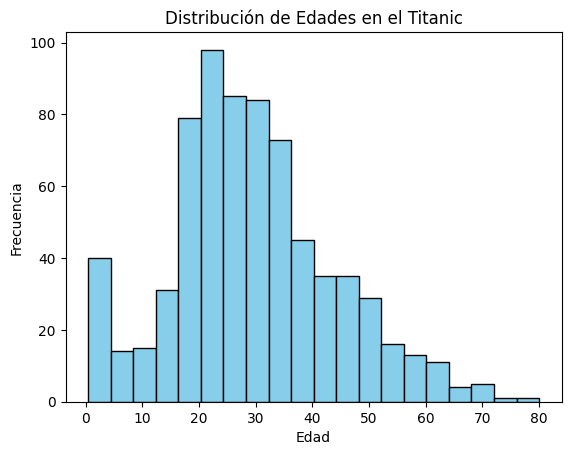

In [16]:
import matplotlib.pyplot as plt

plt.hist(df['Age'].dropna(), bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.title('Distribución de Edades en el Titanic')
plt.show()

#### **1.6.2 Gráfico de barras de supervivencia**

In [17]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

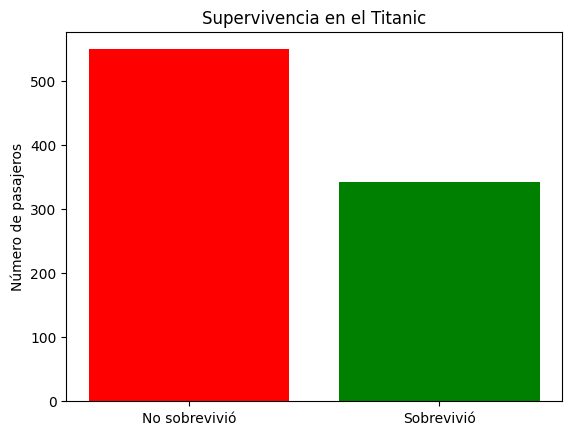

In [18]:
survived_counts = df['Survived'].value_counts()

plt.bar(['No sobrevivió', 'Sobrevivió'], survived_counts, color=['red', 'green'])
plt.ylabel('Número de pasajeros')
plt.title('Supervivencia en el Titanic')
plt.show()


### **1.7 Ejercicios**